In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [39]:
df = pd.read_csv('../data/melb_data.csv', index_col=0)
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [40]:
df.shape

(18396, 21)

In [41]:
def nulls_per(df):
    total_nulls = df.isnull().sum()
    total_observations = df.shape[0]

    null_percentages = total_nulls[total_nulls > 0] / total_observations * 100
    total_nulls = total_nulls[total_nulls > 0]
    nulls = pd.concat([total_nulls, null_percentages], axis=1, keys=['Total', 'Percentage']).sort_values(by='Total', ascending=False)
    return nulls

In [42]:
glenroy = df[df['Suburb'] == 'Glenroy'].reset_index(drop=True)
glenroy.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Glenroy,2/13 Becket St S,3,t,585000.0,S,Stockdale,3/09/2016,13.0,3046.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,8870.0
1,Glenroy,89 John St,3,h,610000.0,S,Ray,3/09/2016,13.0,3046.0,...,1.0,2.0,696.0,118.0,1960.0,Moreland,-37.6972,144.9431,Northern Metropolitan,8870.0
2,Glenroy,1/83 Maude Av,3,t,480000.0,VB,Brad,3/09/2016,13.0,3046.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,8870.0
3,Glenroy,18 Pengana Av,3,h,681500.0,S,Barry,3/09/2016,13.0,3046.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,8870.0
4,Glenroy,52 Tarana Av,3,h,640000.0,S,Nelson,3/09/2016,13.0,3046.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,8870.0


In [45]:
only_6 = glenroy[['Rooms', 'Type', 'Bedroom2']]
only_6[only_6['Rooms'] == 6]

,Rooms,Type,Bedroom2
127,6,h,NaN


In [13]:
nulls_per(df)

,Total,Percentage
BuildingArea,10634,57.806045
YearBuilt,9438,51.304631
CouncilArea,6163,33.501848
Landsize,4793,26.054577
Car,3576,19.439008
Bathroom,3471,18.868232
Bedroom2,3469,18.857360
Lattitude,3332,18.112633
Longtitude,3332,18.112633
Distance,1,0.005436


In [15]:
nulls_per(glenroy)

,Total,Percentage
BuildingArea,155,60.546875
YearBuilt,144,56.250000
CouncilArea,112,43.750000
Landsize,97,37.890625
Bedroom2,88,34.375000
Bathroom,88,34.375000
Car,88,34.375000
Lattitude,88,34.375000
Longtitude,88,34.375000


In [17]:
missing_values = glenroy[['Rooms', 'Type', 'Bedroom2']].isnull().sum()
missing_values

Rooms        0
Type         0
Bedroom2    88
dtype: int64

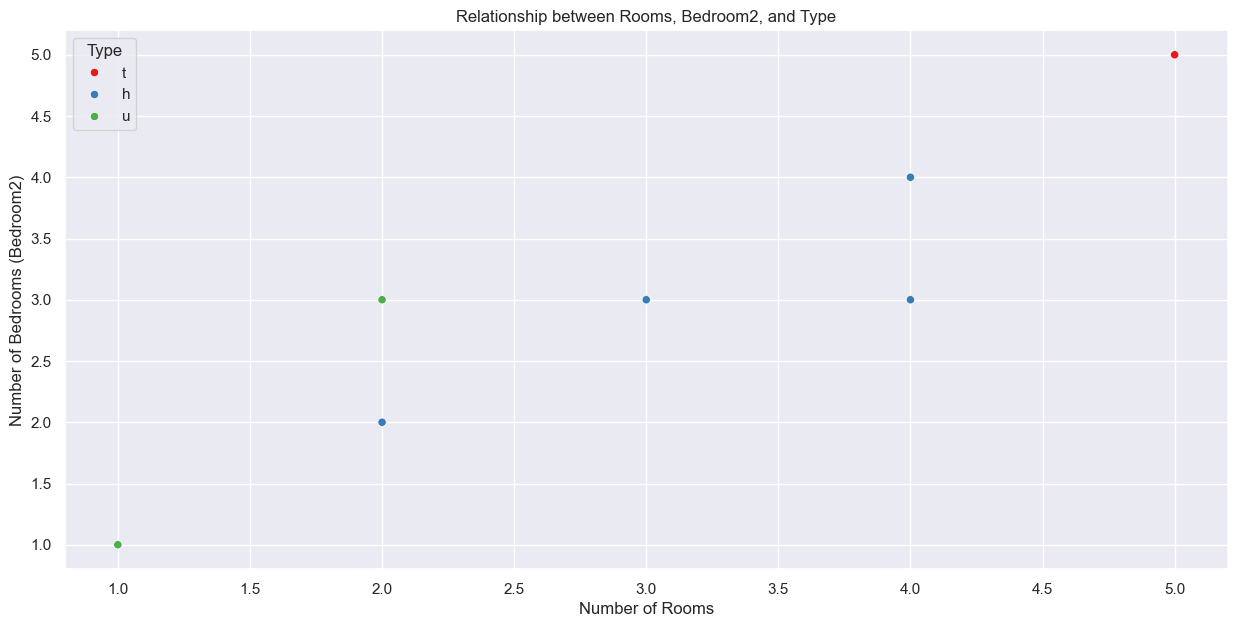

In [18]:
# Plotting
plt.figure(figsize=(15, 7))

# Scatter plot for Rooms vs Bedroom2, colored by Type
sns.scatterplot(data=glenroy, x='Rooms', y='Bedroom2', hue='Type', palette='Set1')

# Setting plot title and labels
plt.title('Relationship between Rooms, Bedroom2, and Type')
plt.xlabel('Number of Rooms')
plt.ylabel('Number of Bedrooms (Bedroom2)')
plt.grid(True)

plt.show()

In [19]:
# Implementing the rule to fill in missing values in 'Bedroom2'
# Rule: Set 'Bedroom2' to one less than 'Rooms', but not less than 0

# Making a copy of the data to preserve the original data
glenroy_data_filled = glenroy.copy()

# Applying the rule
glenroy_data_filled['Bedroom2'] = glenroy_data_filled.apply(
    lambda row: row['Rooms'] - 1 if pd.isna(row['Bedroom2']) else row['Bedroom2'],
    axis=1
)

# Ensuring 'Bedroom2' is not less than 0
glenroy_data_filled['Bedroom2'] = glenroy_data_filled['Bedroom2'].clip(lower=0)

# Checking if the null values are filled
missing_values_after = glenroy_data_filled[['Bedroom2']].isnull().sum()
missing_values_after


Bedroom2    0
dtype: int64

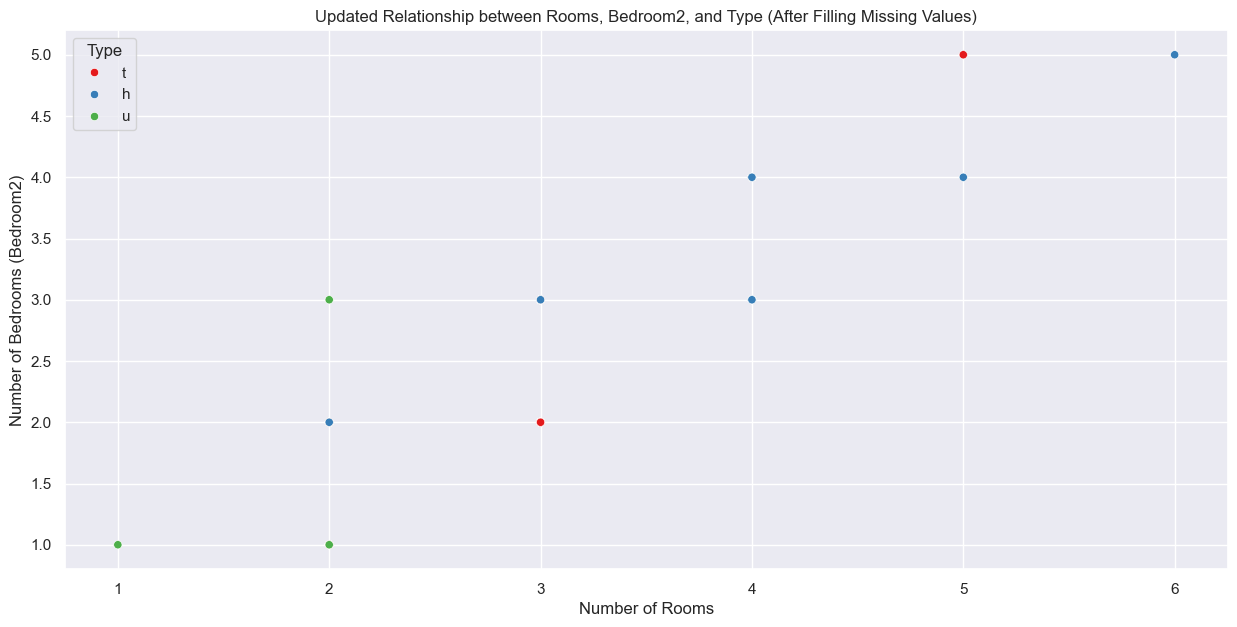

In [20]:
# Replotting the data to see the effect of filling missing values

plt.figure(figsize=(15, 7))

# Scatter plot for Rooms vs Bedroom2, colored by Type, for the updated dataset
sns.scatterplot(data=glenroy_data_filled, x='Rooms', y='Bedroom2', hue='Type', palette='Set1')

# Setting plot title and labels
plt.title('Updated Relationship between Rooms, Bedroom2, and Type (After Filling Missing Values)')
plt.xlabel('Number of Rooms')
plt.ylabel('Number of Bedrooms (Bedroom2)')
plt.grid(True)

plt.show()


In [29]:
# Function to apply the specified rules
def fill_bedroom2(row):
    if pd.isna(row['Bedroom2']):
        if row['Type'] == 'u':
            if row['Rooms'] == 1:
                return 1
            elif row['Rooms'] == 2:
                return 2
            elif row['Rooms'] == 3:
                return 3
        elif row['Type'] == 'h':
            if row['Rooms'] == 2:
                return 2
            elif row['Rooms'] == 3:
                return 3
            elif row['Rooms'] == 4:
                return 4
            elif row['Rooms'] == 5:
                return 5
            elif row['Rooms'] == 6:
                return 6  # Based on frequency analysis
        elif row['Type'] == 't':
            if row['Rooms'] == 2:
                return 5
            elif row['Rooms'] == 3:
                return 3
    return row['Bedroom2']

# Applying the rule
glenroy['Bedroom2'] = glenroy.apply(fill_bedroom2, axis=1)

# Checking if the null values have been filled
updated_missing_values = glenroy['Bedroom2'].isnull().sum()
updated_missing_values


0

In [30]:
null_bedroom2_data = glenroy[glenroy['Bedroom2'].isnull()]
# Displaying the dataframe of the 31 properties with null values in 'Bedroom2'
null_bedroom2_dataframe = null_bedroom2_data.copy()
null_bedroom2_dataframe.reset_index(drop=True, inplace=True)

null_bedroom2_dataframe[['Rooms', 'Type', 'Bedroom2']]


,Rooms,Type,Bedroom2


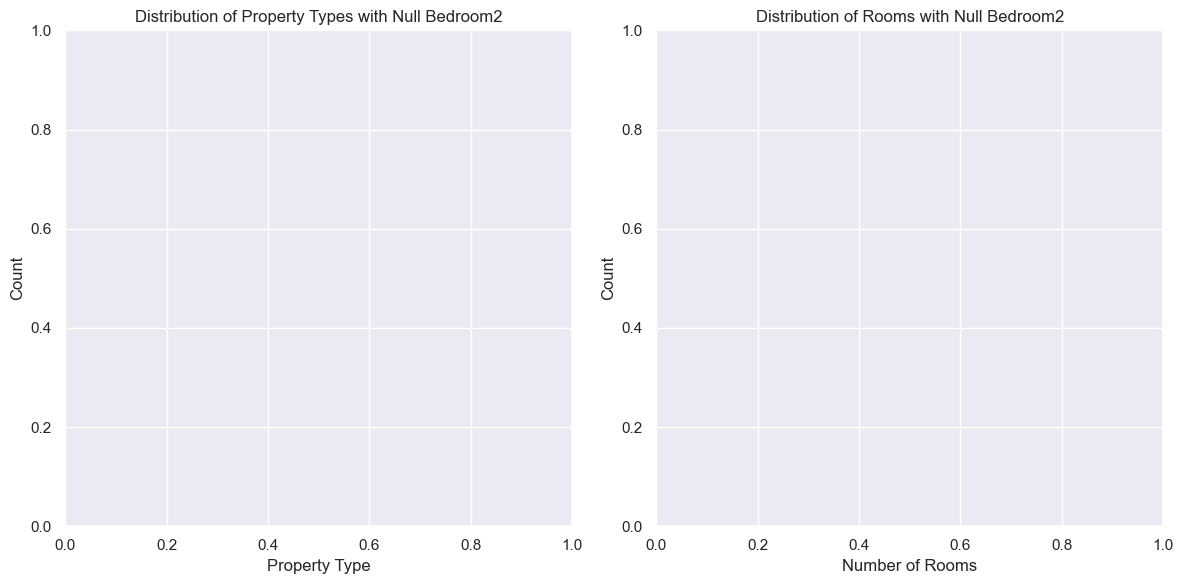

In [35]:
# Extracting the subset of data with remaining null values in 'Bedroom2'
null_bedroom2_data = glenroy[glenroy['Bedroom2'].isnull()]

# Plotting the distribution of 'Type' and 'Rooms' for these null values
plt.figure(figsize=(12, 6))

# Count plot for 'Type'
plt.subplot(1, 2, 1)
sns.countplot(data=null_bedroom2_data, x='Type')
plt.title('Distribution of Property Types with Null Bedroom2')
plt.xlabel('Property Type')
plt.ylabel('Count')

# Count plot for 'Rooms'
plt.subplot(1, 2, 2)
sns.countplot(data=null_bedroom2_data, x='Rooms')
plt.title('Distribution of Rooms with Null Bedroom2')
plt.xlabel('Number of Rooms')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


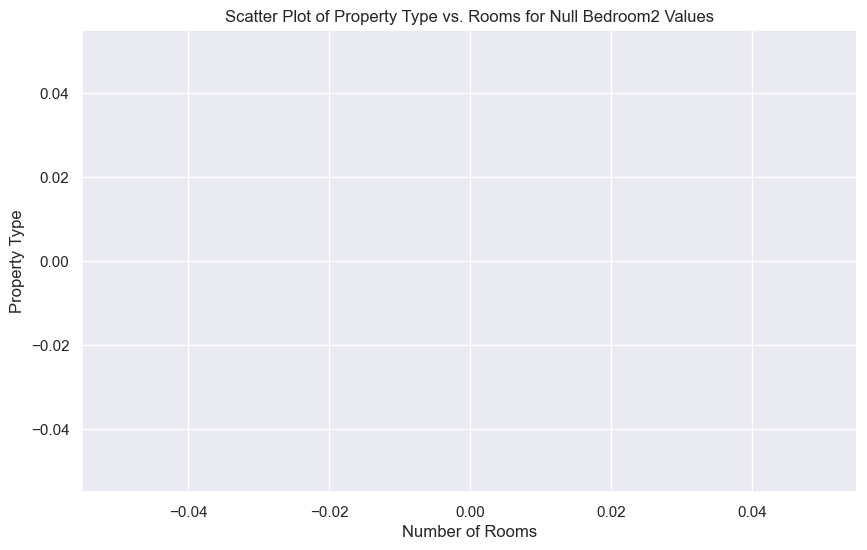

In [32]:
# Creating a scatter plot for the subset with null Bedroom2 values
plt.figure(figsize=(10, 6))

sns.scatterplot(data=null_bedroom2_data, x='Rooms', y='Type', palette='Set1')

plt.title('Scatter Plot of Property Type vs. Rooms for Null Bedroom2 Values')
plt.xlabel('Number of Rooms')
plt.ylabel('Property Type')
plt.grid(True)

plt.show()
